In [146]:
# -*- coding: UTF-8 -*-
import numpy as np
import pandas as pd
import jieba
import jieba.analyse
import codecs
import jieba.posseg as pseg 
import os
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.cluster import KMeans

In [147]:
from collections import Counter
import jieba
jieba.load_userdict('userdict.txt')

# 创建停用词list
def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r').readlines()]
    return stopwords

# 对句子进行分词
def seg_sentence(sentence):
    sentence_seged = jieba.cut(sentence.strip())
    stopwords = stopwordslist('stoped.txt')  # 这里加载停用词的路径
    outstr = ''
    for word in sentence_seged:
        if word not in stopwords:
            if word != '\t':
                outstr += word
                outstr += " "
    return outstr


In [148]:
'''file_name='班主任'
file_path = './dataset/raw_texts/'+file_name+'.txt'
text = open(file_path, 'r',encoding="utf-8") #加载要处理的文件的路径
#df =pd.read_excel('./dataset/难字词库.xlsx') 
#diff_words = df['词语']
result_words = []
sent_arr = []
words_arr = []
for block in text:
    #print(type(block))
    words=list(seg_sentence(block).split(' '))
    #print(words)
    for word in words:
        #print(word)
        words_arr.append(word)'''

In [242]:
def get_all_vector(file_path,stop_words_set,words_arr):
    names = [ os.path.join(file_path,f) for f in os.listdir(file_path) ]
    posts = [ open(name).read() for name in names ]
    docs = []
    word_set = set()
    rest_words = []
    i=0
    for post in posts:
        #doc = del_stop_words(post,stop_words_set)
        doc = list(seg_sentence(post).split(' '))
        #print(doc)
        docs.append(doc)
        word_set |= set(doc)
        
    word_set = list(word_set)
    print(len(word_set))
    docs_vsm = []
    #for word in word_set[:30]:
        #print word.encode("utf-8"),
    for doc in docs:
        #遍历每篇文章
        temp_vector = []
        for word in word_set:
            i+=1
           
            rest_words.append(word)
            #计算当前文章有多少这个词
            temp_vector.append(doc.count(word) * 1.0)
        #print temp_vector[-30:-1]
        #print(temp_vector)
        docs_vsm.append(temp_vector)
    print(len(docs_vsm))
    docs_matrix = np.array(docs_vsm)
    #print(docs_matrix)
    column_sum = [ float(len(np.nonzero(docs_matrix[:,i])[0])) for i in range(docs_matrix.shape[1]) ]
    column_sum = np.array(column_sum)
    column_sum = docs_matrix.shape[0] / column_sum
    idf =  np.log(column_sum)
    idf =  np.diag(idf)
    # 根据IDF的定义，计算词的IDF并不依赖于某个文档，所以我们提前计算好。
    # 注意一下计算都是矩阵运算，不是单个变量的运算。
    
    for doc_v in docs_matrix:
        if doc_v.sum() == 0:
            doc_v = doc_v / 1
        else:
            doc_v = doc_v / (doc_v.sum())
        tfidf = np.dot(docs_matrix,idf)
    return names,tfidf,word_set

In [243]:
stopwords = stopwordslist('stoped.txt')
files_path = './dataset/raw_texts/'
names,tfidf,word_set = get_all_vector(files_path,stopwords,words_arr)

6376
13


In [213]:
print(len(word_set))

6376


In [244]:
names

['./dataset/raw_texts/恋爱的犀牛剧本.txt',
 './dataset/raw_texts/远方飞来了一只红蜻蜓.txt',
 './dataset/raw_texts/开市客火爆背后，美国零售业经历过的惨烈搏杀.txt',
 './dataset/raw_texts/班主任.txt',
 './dataset/raw_texts/温柔的夜-三毛.txt',
 './dataset/raw_texts/产业基础高级化 发展迈向高质量.txt',
 './dataset/raw_texts/白雪公主.txt',
 './dataset/raw_texts/小美人鱼.txt',
 './dataset/raw_texts/老屋小记.txt',
 './dataset/raw_texts/冯骥才-这个时代文化的使命首先是抢救.txt',
 './dataset/raw_texts/过年.txt',
 './dataset/raw_texts/春.txt',
 './dataset/raw_texts/金童求雨记.txt']

In [245]:
tfidf

array([[0.        , 2.56494936, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.46633707, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [246]:
df = pd.DataFrame(tfidf).T

In [247]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,2.564949,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.0,0.0,2.564949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.0,2.564949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.564949,0.0


In [233]:
df['词语'] = word_set

In [234]:
new_df = df.set_index('词语').T
new_df.head()


词语,,等级,犟肉,相,发亮,毁灭,满脑袋,金色,转眼,膨胀,...,主观,走起路来,吖,行动者,选取,一路上,构筑,当然,上来,闪现
0,0.0,2.564949,0.000000,0.000000,0.0,2.564949,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,2.564949,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
2,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,2.564949,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
3,0.0,0.000000,2.564949,2.564949,0.0,0.000000,2.564949,0.0,0.0,0.000000,...,2.564949,0.0,0.000000,0.0,0.0,2.564949,0.0,1.466337,0.000000,0.0
4,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,7.331685,12.824747,0.0


In [235]:
new_df.columns

Index(['', '等级', '犟肉', '相', '发亮', '毁灭', '满脑袋', '金色', '转眼', '膨胀',
       ...
       '主观', '走起路来', '吖', '行动者', '选取', '一路上', '构筑', '当然', '上来', '闪现'],
      dtype='object', name='词语', length=6376)

In [238]:
new_df.drop(1)

词语,,等级,犟肉,相,发亮,毁灭,满脑袋,金色,转眼,膨胀,...,主观,走起路来,吖,行动者,选取,一路上,构筑,当然,上来,闪现
0,0.0,2.564949,0.000000,0.000000,0.000000,2.564949,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.564949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.564949,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,2.564949,2.564949,0.000000,0.000000,2.564949,0.000000,0.000000,0.000000,...,2.564949,0.000000,0.000000,0.000000,0.000000,2.564949,0.000000,1.466337,0.000000,0.000000
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.331685,12.824747,0.000000
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.564949,0.000000,0.000000,0.000000
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.564949,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.564949,0.000000,0.000000,...,0.000000,2.564949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.564949,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.564949
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.564949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.466337,0.000000,0.000000


In [165]:
num_clusters = 4
km_cluster = KMeans(n_clusters=num_clusters, max_iter=300, n_init=2, \
                    init='k-means++',n_jobs=10)

'''
n_clusters: 指定K的值
max_iter: 对于单次初始值计算的最大迭代次数
n_init: 重新选择初始值的次数
init: 制定初始值选择的算法
n_jobs: 进程个数，为-1的时候是指默认跑满CPU
注意，这个对于单个初始值的计算始终只会使用单进程计算，
并行计算只是针对与不同初始值的计算。比如n_init=10，n_jobs=40, 
服务器上面有20个CPU可以开40个进程，最终只会开10个进程
'''
#返回各自文本的所被分配到的类索引
result = km_cluster.fit_predict(tfidf)


In [166]:
result

array([0, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2, 1], dtype=int32)

In [167]:
names

['./dataset/raw_texts/恋爱的犀牛剧本.txt',
 './dataset/raw_texts/远方飞来了一只红蜻蜓.txt',
 './dataset/raw_texts/开市客火爆背后，美国零售业经历过的惨烈搏杀.txt',
 './dataset/raw_texts/班主任.txt',
 './dataset/raw_texts/温柔的夜-三毛.txt',
 './dataset/raw_texts/产业基础高级化 发展迈向高质量.txt',
 './dataset/raw_texts/白雪公主.txt',
 './dataset/raw_texts/小美人鱼.txt',
 './dataset/raw_texts/老屋小记.txt',
 './dataset/raw_texts/冯骥才-这个时代文化的使命首先是抢救.txt',
 './dataset/raw_texts/过年.txt',
 './dataset/raw_texts/春.txt',
 './dataset/raw_texts/金童求雨记.txt']

In [168]:
from sklearn.metrics.pairwise import cosine_similarity
#Note that 有了 dist 就可以测量任意两个或多个概要之间的相似性.
#cosine_similarity返回An array with shape (n_samples_X, n_samples_Y)
dist = 1 - cosine_similarity(tfidf)
dist

array([[ 0.00000000e+00,  9.96890262e-01,  9.87333036e-01,
         9.91374719e-01,  9.66251982e-01,  7.99078243e-01,
         9.90830716e-01,  9.95903851e-01,  4.64007654e-01,
         9.89915435e-01,  9.88899700e-01,  9.95866205e-01,
         9.61532023e-01],
       [ 9.96890262e-01,  0.00000000e+00,  9.99117920e-01,
         9.93648926e-01,  9.88999824e-01,  9.99801770e-01,
         9.95248071e-01,  9.97570058e-01,  9.90103357e-01,
         9.98410444e-01,  9.91624973e-01,  9.98101820e-01,
         9.95301750e-01],
       [ 9.87333036e-01,  9.99117920e-01,  1.11022302e-16,
         9.88499297e-01,  9.81459419e-01,  9.84840392e-01,
         9.94548855e-01,  9.99024956e-01,  9.93595459e-01,
         9.73423801e-01,  9.88551696e-01,  9.94054548e-01,
         9.95746362e-01],
       [ 9.91374719e-01,  9.93648926e-01,  9.88499297e-01,
         8.88178420e-16,  9.63669187e-01,  9.92402449e-01,
         9.84807122e-01,  9.94252355e-01,  9.77623376e-01,
         9.79942165e-01,  9.69194245e

In [170]:
from scipy.cluster.hierarchy import ward, dendrogram, linkage
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] #用来正常显示中文标签
#Perform Ward's linkage on a condensed distance matrix.
#linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances
#Method 'ward' requires the distance metric to be Euclidean
linkage_matrix = linkage(dist, method='ward', metric='euclidean', optimal_ordering=False)
#Z[i] will tell us which clusters were merged, let's take a look at the first two points that were merged
#We can see that ach row of the resulting array has the format [idx1, idx2, dist, sample_count]
print(linkage_matrix)
for index, name in enumerate(names):
    print(index, name)


[[ 0.          8.          0.65859172  2.        ]
 [ 5.         13.          1.27443386  3.        ]
 [ 6.          7.          1.30344688  2.        ]
 [ 4.         10.          1.35245153  2.        ]
 [ 3.         16.          1.37238959  3.        ]
 [11.         12.          1.376052    2.        ]
 [ 2.          9.          1.37677517  2.        ]
 [17.         18.          1.40422601  5.        ]
 [ 1.         19.          1.4248157   3.        ]
 [20.         21.          1.43313206  8.        ]
 [15.         22.          1.49181618 10.        ]
 [14.         23.          2.11570253 13.        ]]
0 ./dataset/raw_texts/恋爱的犀牛剧本.txt
1 ./dataset/raw_texts/远方飞来了一只红蜻蜓.txt
2 ./dataset/raw_texts/开市客火爆背后，美国零售业经历过的惨烈搏杀.txt
3 ./dataset/raw_texts/班主任.txt
4 ./dataset/raw_texts/温柔的夜-三毛.txt
5 ./dataset/raw_texts/产业基础高级化 发展迈向高质量.txt
6 ./dataset/raw_texts/白雪公主.txt
7 ./dataset/raw_texts/小美人鱼.txt
8 ./dataset/raw_texts/老屋小记.txt
9 ./dataset/raw_texts/冯骥才-这个时代文化的使命首先是抢救.txt
10 ./dataset/raw_texts/过

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


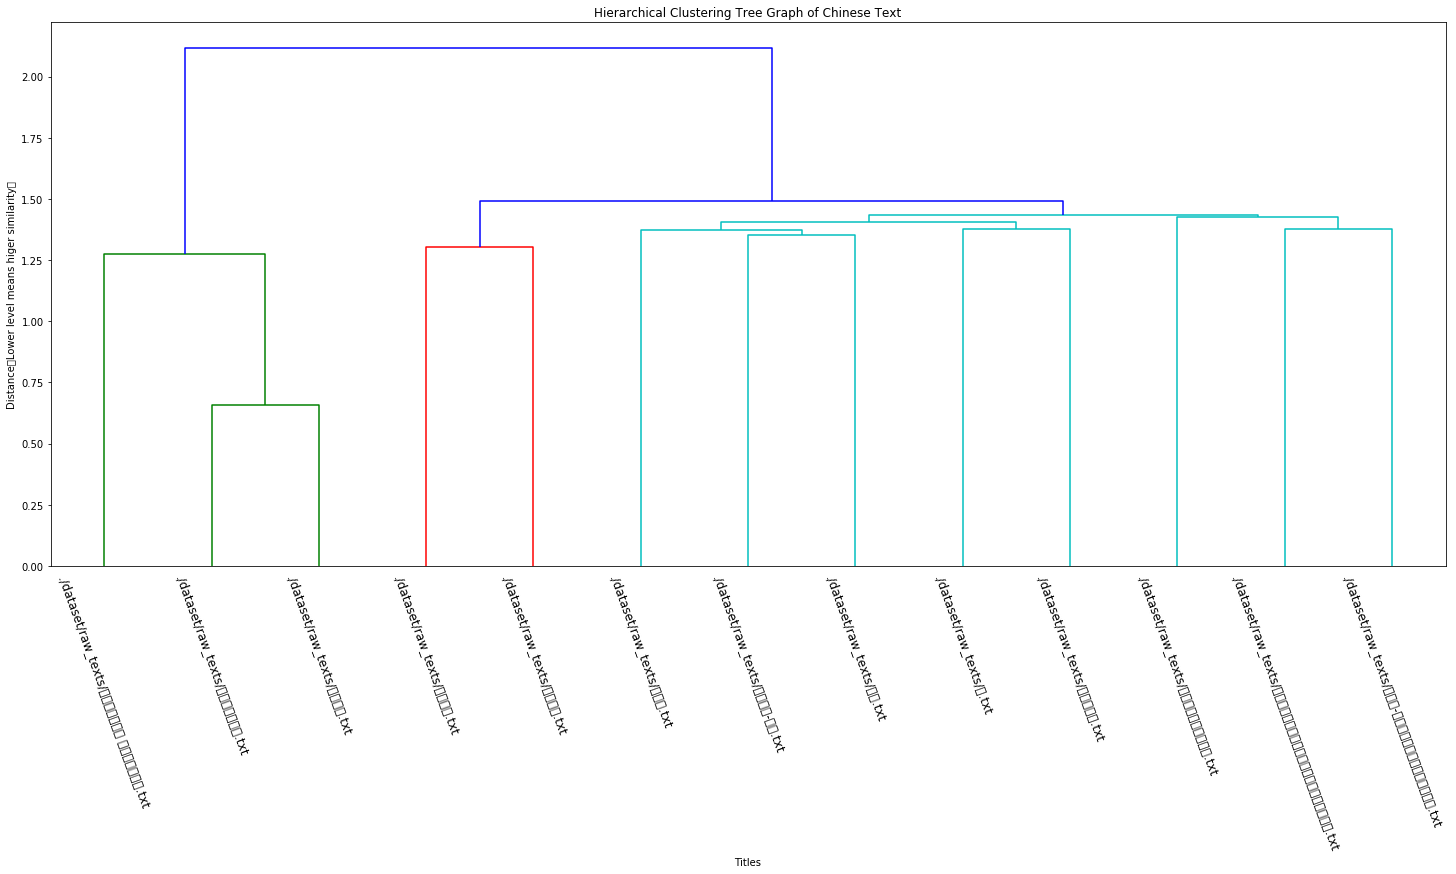

In [179]:

import matplotlib.pyplot as plt
 
from pylab import *
#plt.rcParams['font.sans-serif'] = ['SimHei']

plt.figure(figsize=(25, 10))
#plt.title('中文文本层次聚类树状图')

plt.title('Hierarchical Clustering Tree Graph of Chinese Text')
plt.xlabel('Titles')
plt.ylabel('Distance（Lower level means higer similarity）')
dendrogram(
    linkage_matrix,
    labels=names, 
    leaf_rotation=-70,  # rotates the x axis labels
    leaf_font_size=12  # font size for the x axis labels
)
plt.show()
plt.close()

